# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import time

In [2]:
X = np.linspace(0, 1, 50)
Y = np.random.rand(50) + X * 2.4 + 3

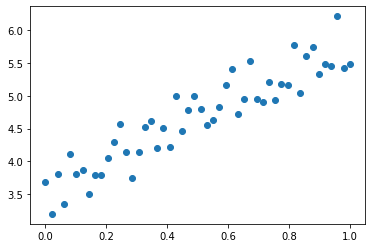

In [3]:
plt.scatter(X, Y)

In [4]:
SEED = 504

In [5]:
np.random.seed(SEED)
W = np.random.randn(1)[0] * 10
b = np.random.randn(1)[0] * 10
W, b

(-5.513803307109124, 10.520078236890855)

In [6]:
def hypothesis(X):
    return X * W + b

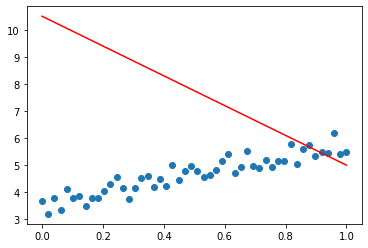

In [7]:
plt.scatter(X, Y)
plt.plot([0, 1], hypothesis(np.array([0, 1])), color='r')

In [8]:
def loss():
    return np.mean((hypothesis(X) - Y) ** 2)

In [9]:
loss()

14.760049812276089

In [10]:
def dW():
    return np.mean(2 * (hypothesis(X) - Y) * X)

def db():
    return np.mean(2 * (hypothesis(X) - Y))

In [11]:
dW(), db()

(1.75516972944994, 6.180705298073997)

In [12]:
np.random.seed(SEED)
W = np.random.randn(1)[0] * 10
b = np.random.randn(1)[0] * 10

lr = 0.05
losses = []

# Training
for i in tqdm(range(1000)):
    W = W - dW() * lr
    b = b - db() * lr
    l = loss()
    losses.append(l)

  0%|          | 0/1000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Loss curve')

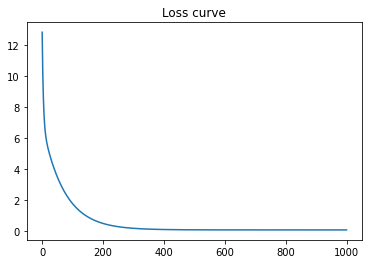

In [13]:
plt.plot(losses)
plt.title('Loss curve')

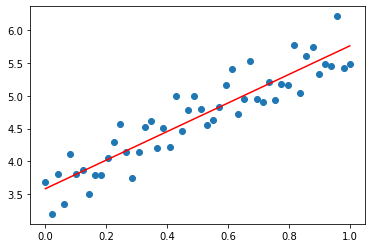

In [14]:
plt.scatter(X, Y)
plt.plot([0, 1], hypothesis(np.array([0, 1])), color='r')

**Live training**

In [15]:
from ipywidgets import Output, HBox
from IPython.display import display, clear_output

In [16]:
scater_out = Output()
loss_out = Output()
all_outs = HBox([scater_out, loss_out])

In [17]:
np.random.seed(SEED)
W = np.random.randn(1)[0] * 10
b = np.random.randn(1)[0] * 10

lr = 0.5
losses = []

display(all_outs)

for i in tqdm(range(50)):
    W = W - dW() * lr
    b = b - db() * lr
    l = loss()
    losses.append(l)
#     time.sleep(0.001)

    with scater_out:
        clear_output(wait=True)
        plt.scatter(X, Y)
        plt.plot([0, 1], hypothesis(np.array([0, 1])), color='r')
        plt.title('Hypothesis')
        plt.show(block=False)
        
    with loss_out:
        clear_output(wait=True)
        plt.plot(losses)
        plt.title('Loss curve')
        plt.show(block=False)

  0%|          | 0/50 [00:00<?, ?it/s]